In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [179]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [182]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
benign_0__mal_1            0
dtype: int64

In [184]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


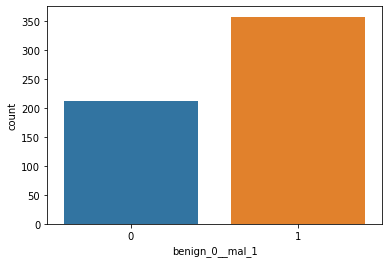

In [185]:
sns.countplot(x = 'benign_0__mal_1', data = df)

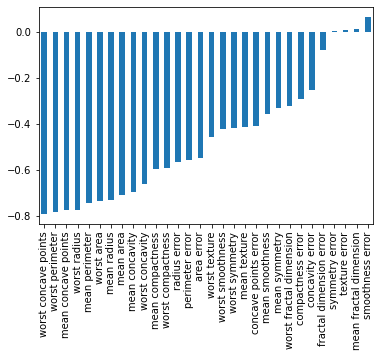

In [191]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot( kind = 'bar')

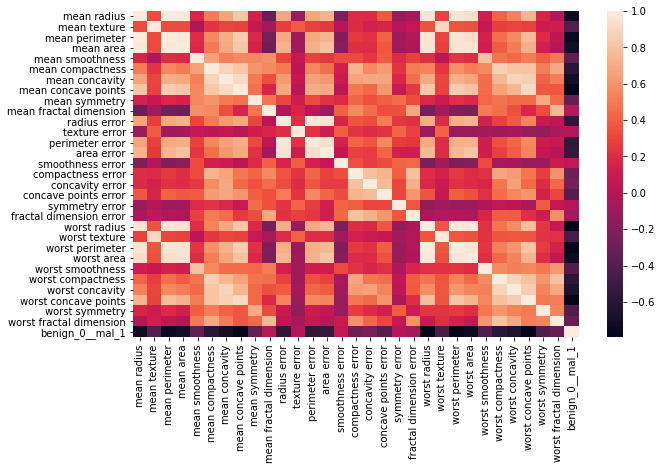

In [195]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr())

In [196]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [200]:
from sklearn.preprocessing import MinMaxScaler

In [201]:
scaler = MinMaxScaler()

In [203]:
X_train = scaler.fit_transform(X_train)

In [204]:
X_test = scaler.transform(X_test)

In [205]:
from tensorflow.keras.models import Sequential

In [206]:
model = Sequential()

In [207]:
from tensorflow.keras.layers import Dense, Dropout, Activation

In [209]:
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [210]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 6ms/sample - loss: 0.6790 - val_loss: 0.6626
Epoch 2/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6405 - val_loss: 0.6131
Epoch 3/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5827 - val_loss: 0.5413
Epoch 4/600
426/426 [==============================] - 0s 113us/sample - loss: 0.4960 - val_loss: 0.4356
Epoch 5/600
426/426 [==============================] - 0s 110us/sample - loss: 0.3785 - val_loss: 0.3207
Epoch 6/600
426/426 [==============================] - 0s 108us/sample - loss: 0.2771 - val_loss: 0.2325
Epoch 7/600
426/426 [==============================] - 0s 108us/sample - loss: 0.2006 - val_loss: 0.1756
Epoch 8/600
426/426 [==============================] - 0s 119us/sample - loss: 0.1604 - val_loss: 0.1667
Epoch 9/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1430 - val_loss: 0.1339
Epoch 10/60

426/426 [==============================] - 0s 98us/sample - loss: 0.0434 - val_loss: 0.1176
Epoch 79/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0409 - val_loss: 0.1223
Epoch 80/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0342 - val_loss: 0.1054
Epoch 81/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0354 - val_loss: 0.1196
Epoch 82/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0300 - val_loss: 0.1246
Epoch 83/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0314 - val_loss: 0.1241
Epoch 84/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0302 - val_loss: 0.1207
Epoch 85/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0313 - val_loss: 0.1299
Epoch 86/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0349 - val_loss: 0.1125
Epoch 87/600
426/426 [==============================] - 0s 96u

Epoch 155/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0113 - val_loss: 0.1482
Epoch 156/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0094 - val_loss: 0.1599
Epoch 157/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0060 - val_loss: 0.1855
Epoch 158/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0059 - val_loss: 0.1652
Epoch 159/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0062 - val_loss: 0.1981
Epoch 160/600
426/426 [==============================] - 0s 93us/sample - loss: 0.0076 - val_loss: 0.2167
Epoch 161/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0172 - val_loss: 0.1657
Epoch 162/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0059 - val_loss: 0.1665
Epoch 163/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0057 - val_loss: 0.2038
Epoch 164/600
426/426 [=================

Epoch 232/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0010 - val_loss: 0.2504
Epoch 233/600
426/426 [==============================] - 0s 98us/sample - loss: 0.0011 - val_loss: 0.2405
Epoch 234/600
426/426 [==============================] - 0s 98us/sample - loss: 9.8942e-04 - val_loss: 0.2505
Epoch 235/600
426/426 [==============================] - 0s 105us/sample - loss: 9.7718e-04 - val_loss: 0.2427
Epoch 236/600
426/426 [==============================] - 0s 98us/sample - loss: 9.7207e-04 - val_loss: 0.2515
Epoch 237/600
426/426 [==============================] - 0s 101us/sample - loss: 9.9863e-04 - val_loss: 0.2327
Epoch 238/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0013 - val_loss: 0.2831
Epoch 239/600
426/426 [==============================] - 0s 105us/sample - loss: 0.0012 - val_loss: 0.2184
Epoch 240/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0019 - val_loss: 0.2584
Epoch 241/600
426/426 [=

426/426 [==============================] - 0s 101us/sample - loss: 3.7332e-04 - val_loss: 0.3065
Epoch 307/600
426/426 [==============================] - 0s 108us/sample - loss: 4.0456e-04 - val_loss: 0.2876
Epoch 308/600
426/426 [==============================] - 0s 103us/sample - loss: 3.2096e-04 - val_loss: 0.2949
Epoch 309/600
426/426 [==============================] - 0s 103us/sample - loss: 3.1118e-04 - val_loss: 0.2910
Epoch 310/600
426/426 [==============================] - 0s 101us/sample - loss: 3.0838e-04 - val_loss: 0.3129
Epoch 311/600
426/426 [==============================] - 0s 101us/sample - loss: 2.9557e-04 - val_loss: 0.2923
Epoch 312/600
426/426 [==============================] - 0s 96us/sample - loss: 2.8543e-04 - val_loss: 0.2931
Epoch 313/600
426/426 [==============================] - 0s 105us/sample - loss: 2.9118e-04 - val_loss: 0.2985
Epoch 314/600
426/426 [==============================] - 0s 96us/sample - loss: 3.5582e-04 - val_loss: 0.3043
Epoch 315/600
426

Epoch 380/600
426/426 [==============================] - 0s 106us/sample - loss: 1.2187e-04 - val_loss: 0.3292
Epoch 381/600
426/426 [==============================] - 0s 104us/sample - loss: 1.2552e-04 - val_loss: 0.3399
Epoch 382/600
426/426 [==============================] - 0s 103us/sample - loss: 1.2167e-04 - val_loss: 0.3321
Epoch 383/600
426/426 [==============================] - 0s 101us/sample - loss: 1.3056e-04 - val_loss: 0.3324
Epoch 384/600
426/426 [==============================] - 0s 109us/sample - loss: 1.2350e-04 - val_loss: 0.3329
Epoch 385/600
426/426 [==============================] - 0s 110us/sample - loss: 1.1731e-04 - val_loss: 0.3349
Epoch 386/600
426/426 [==============================] - 0s 119us/sample - loss: 1.1423e-04 - val_loss: 0.3351
Epoch 387/600
426/426 [==============================] - 0s 108us/sample - loss: 1.2290e-04 - val_loss: 0.3304
Epoch 388/600
426/426 [==============================] - 0s 91us/sample - loss: 1.1963e-04 - val_loss: 0.3465
Ep

Epoch 454/600
426/426 [==============================] - 0s 117us/sample - loss: 5.4128e-05 - val_loss: 0.3685
Epoch 455/600
426/426 [==============================] - 0s 100us/sample - loss: 5.5364e-05 - val_loss: 0.3585
Epoch 456/600
426/426 [==============================] - 0s 98us/sample - loss: 5.5854e-05 - val_loss: 0.3662
Epoch 457/600
426/426 [==============================] - 0s 117us/sample - loss: 5.7726e-05 - val_loss: 0.3723
Epoch 458/600
426/426 [==============================] - 0s 106us/sample - loss: 5.5621e-05 - val_loss: 0.3720
Epoch 459/600
426/426 [==============================] - 0s 103us/sample - loss: 5.3370e-05 - val_loss: 0.3692
Epoch 460/600
426/426 [==============================] - 0s 101us/sample - loss: 5.3581e-05 - val_loss: 0.3779
Epoch 461/600
426/426 [==============================] - 0s 103us/sample - loss: 5.6569e-05 - val_loss: 0.3666
Epoch 462/600
426/426 [==============================] - 0s 108us/sample - loss: 5.1890e-05 - val_loss: 0.3689
Ep

Epoch 528/600
426/426 [==============================] - 0s 111us/sample - loss: 2.7278e-05 - val_loss: 0.3989
Epoch 529/600
426/426 [==============================] - 0s 115us/sample - loss: 2.7356e-05 - val_loss: 0.4081
Epoch 530/600
426/426 [==============================] - 0s 126us/sample - loss: 2.7445e-05 - val_loss: 0.3985
Epoch 531/600
426/426 [==============================] - 0s 101us/sample - loss: 2.7023e-05 - val_loss: 0.3978
Epoch 532/600
426/426 [==============================] - 0s 98us/sample - loss: 2.6287e-05 - val_loss: 0.3996
Epoch 533/600
426/426 [==============================] - 0s 112us/sample - loss: 2.6788e-05 - val_loss: 0.4071
Epoch 534/600
426/426 [==============================] - 0s 119us/sample - loss: 2.7625e-05 - val_loss: 0.4001
Epoch 535/600
426/426 [==============================] - 0s 115us/sample - loss: 2.4930e-05 - val_loss: 0.4126
Epoch 536/600
426/426 [==============================] - 0s 117us/sample - loss: 2.7927e-05 - val_loss: 0.3993
Ep

In [211]:
losses = pd.DataFrame(model.history.history)

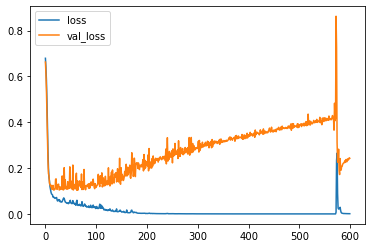

In [212]:
losses.plot()

In [218]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [219]:
from tensorflow.keras.callbacks import EarlyStopping

In [220]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [221]:
early_stop = EarlyStopping(monitor= 'val_loss', mode ='min', patience=25, verbose=1)

In [222]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6729 - val_loss: 0.6580
Epoch 2/600
426/426 [==============================] - 0s 211us/sample - loss: 0.6410 - val_loss: 0.6260
Epoch 3/600
426/426 [==============================] - 0s 183us/sample - loss: 0.6083 - val_loss: 0.5939
Epoch 4/600
426/426 [==============================] - 0s 154us/sample - loss: 0.5732 - val_loss: 0.5554
Epoch 5/600
426/426 [==============================] - 0s 147us/sample - loss: 0.5302 - val_loss: 0.5071
Epoch 6/600
426/426 [==============================] - 0s 150us/sample - loss: 0.4824 - val_loss: 0.4630
Epoch 7/600
426/426 [==============================] - 0s 192us/sample - loss: 0.4386 - val_loss: 0.4177
Epoch 8/600
426/426 [==============================] - 0s 147us/sample - loss: 0.4005 - val_loss: 0.3766
Epoch 9/600
426/426 [==============================] - 0s 112us/sample - loss: 0.3704 - val_loss: 0.3421
Epoch 10/60

426/426 [==============================] - 0s 110us/sample - loss: 0.0563 - val_loss: 0.1066
Epoch 79/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0591 - val_loss: 0.1025
Epoch 80/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0573 - val_loss: 0.1142
Epoch 81/600
426/426 [==============================] - 0s 103us/sample - loss: 0.0585 - val_loss: 0.1026
Epoch 82/600
426/426 [==============================] - 0s 91us/sample - loss: 0.0556 - val_loss: 0.1124
Epoch 83/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0558 - val_loss: 0.1037
Epoch 84/600
426/426 [==============================] - 0s 114us/sample - loss: 0.0562 - val_loss: 0.1068
Epoch 85/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0548 - val_loss: 0.1061
Epoch 86/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0540 - val_loss: 0.1071
Epoch 87/600
426/426 [==============================] - 0s 114u

In [223]:
model_loss =pd.DataFrame(model.history.history)

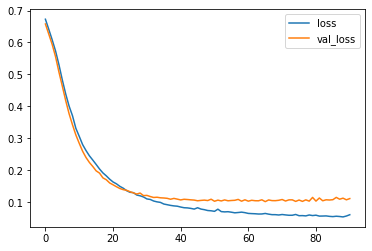

In [224]:
model_loss.plot()

In [231]:
from tensorflow.keras.layers import Dropout

In [232]:
model = Sequential()
model.add(Dense(30, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

In [233]:
model.fit(X_train, y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7079 - val_loss: 0.6739
Epoch 2/600
426/426 [==============================] - 0s 128us/sample - loss: 0.6647 - val_loss: 0.6496
Epoch 3/600
426/426 [==============================] - 0s 136us/sample - loss: 0.6428 - val_loss: 0.6263
Epoch 4/600
426/426 [==============================] - 0s 122us/sample - loss: 0.6265 - val_loss: 0.6004
Epoch 5/600
426/426 [==============================] - 0s 133us/sample - loss: 0.5948 - val_loss: 0.5730
Epoch 6/600
426/426 [==============================] - 0s 133us/sample - loss: 0.5681 - val_loss: 0.5425
Epoch 7/600
426/426 [==============================] - 0s 110us/sample - loss: 0.5346 - val_loss: 0.5065
Epoch 8/600
426/426 [==============================] - 0s 112us/sample - loss: 0.5232 - val_loss: 0.4670
Epoch 9/600
426/426 [==============================] - 0s 115us/sample - loss: 0.4776 - val_loss: 0.4321
Epoch 10/60

426/426 [==============================] - 0s 124us/sample - loss: 0.1235 - val_loss: 0.0974
Epoch 79/600
426/426 [==============================] - 0s 155us/sample - loss: 0.1169 - val_loss: 0.1036
Epoch 80/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1007 - val_loss: 0.0986
Epoch 81/600
426/426 [==============================] - 0s 108us/sample - loss: 0.1240 - val_loss: 0.1058
Epoch 82/600
426/426 [==============================] - 0s 101us/sample - loss: 0.1015 - val_loss: 0.0963
Epoch 83/600
426/426 [==============================] - 0s 110us/sample - loss: 0.1028 - val_loss: 0.0979
Epoch 84/600
426/426 [==============================] - 0s 103us/sample - loss: 0.1145 - val_loss: 0.0947
Epoch 85/600
426/426 [==============================] - 0s 105us/sample - loss: 0.1007 - val_loss: 0.1135
Epoch 86/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0989 - val_loss: 0.0967
Epoch 87/600
426/426 [==============================] - 0s 9

In [234]:
model_loss = pd.DataFrame(model.history.history)

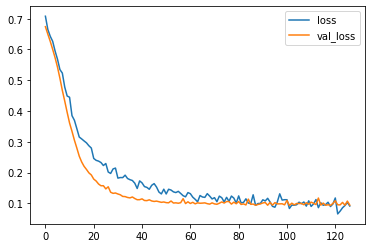

In [236]:
model_loss.plot()

In [239]:
predictions = model.predict_classes(X_test)

In [240]:
from sklearn.metrics import classification_report, confusion_matrix

In [241]:
print(classification_report(y_test, predictions))

print('\n')

print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        55
           1       0.99      0.99      0.99        88

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



[[54  1]
 [ 1 87]]
